In [9]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import wget
import time
import os
import fnmatch


## 1. Download all PDF files from a website using Python

 Here is an exsample of how to build a script that can identify and download all PDFs from a website to you from doing it manually. 
 
 Firstly, let's find all links on the webpage. As an exsample I will scrape page https://www.rhs.org.uk/education-learning/libraries-at-rhs/collections/library-online. 
 
 After all the links are identified you will need to identify links linking to PDF files. Those will end with .pdf.
 
 Below you can see a screenshot of my exsaple page showing PDF links that this scraper will download in the juputer notebook folder.  

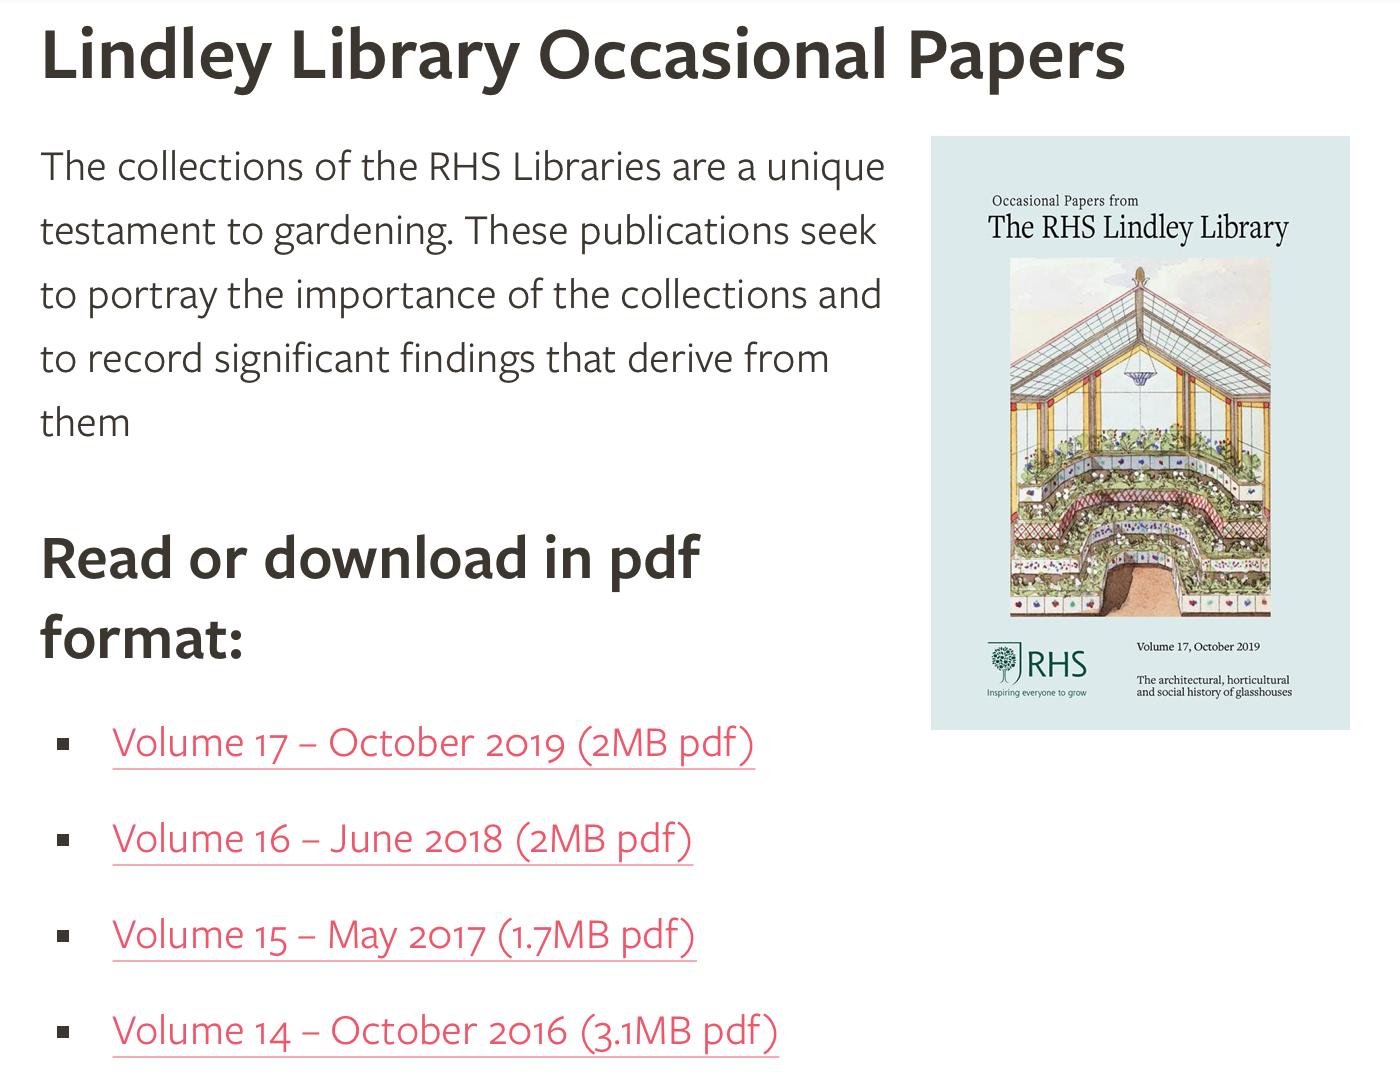

### 1.1 Connect to website and get list of all links avaliable from the url

In [8]:
url = 'https://www.rhs.org.uk/education-learning/libraries-at-rhs/collections/library-online'
    
list_of_urls = []
    

html = urlopen(url) 
bsObj = BeautifulSoup(html.read());

for link in bsObj.find_all('a'):
    list_of_urls.append(link.get('href'))

In [7]:
list_of_urls

['#skip-content',
 '#skip-nav',
 '/',
 '/join',
 '#mobile-nav-menu',
 '#mobile-nav-search',
 '/join',
 '/',
 '#mobile-nav-menu',
 '#mobile-nav-search',
 '#nav-get-involved',
 '#nav-gardening',
 '#nav-shows',
 '#nav-gardens',
 '#nav-learn',
 '#nav-science',
 '#nav-shop',
 '#nav-about',
 '/my-rhs',
 '#nav-search',
 '/join',
 '/',
 '/my-rhs',
 '#',
 '#',
 '#',
 '#',
 '/get-involved/greening-great-britain',
 '/education-learning/careers-horticulture/horticulture-matters',
 '/get-involved/wild-about-gardens',
 'http://nationalgardeningweek.org.uk/',
 '/get-involved/schools',
 '/get-involved/volunteer',
 '#',
 '#',
 '/get-involved/community-gardening',
 '/get-involved/britain-in-bloom',
 '/get-involved/its-your-neighbourhood',
 '/get-involved/affiliated-societies',
 '/get-involved/find-a-group',
 '/get-involved/schools',
 '/join',
 '#',
 '#',
 '/join#join-individual',
 '/join#join-gift',
 '/join#join-life',
 '/membership/rhs-student-membership',
 '/membership/rhs-fellowship',
 '/membership/f

Now that we have a list of all links avaliable on the exsample website it is time to narrow down the list to links connected to PDF files.  

### 1.2 Select links that are conneted to PDF files. 

Before we select all links that end with the .pdf using fnmatch library you will need to check that all urls in the list list_of_urls are strings.

Let's print non string urls in the list.

In [ ]:
for link in list_of_urls:
    if type(link) != str:
        print(link)
        print(type(link))

Time to select all PDF links.

In [25]:
pdf_urls = []

for link in list_of_urls:
    if type(link) == str:
        if fnmatch.fnmatch(link, '*.pdf'):
            pdf_urls.append(link)
            print(link)
        else:
            pass

/about-the-rhs/pdfs/publications/lindley-library-occasional-papers/lindley-library-occasional-papers-vol-17.pdf
/about-the-rhs/pdfs/publications/lindley-library-occasional-papers/OPLL16-for-website-JUN2018.pdf
/about-the-rhs/pdfs/publications/lindley-library-occasional-papers/Vol-15-May-2017.pdf
/about-the-rhs/pdfs/publications/lindley-library-occasional-papers/volume-14-oct-2016.pdf
/about-the-rhs/pdfs/publications/lindley-library-occasional-papers/Volume-13-Nov-2015.pdf
/about-the-rhs/pdfs/publications/lindley-library-occasional-papers/volume-12-september-2014.pdf
/about-the-rhs/pdfs/publications/lindley-library-occasional-papers/OPLL11forWeb-pdf.pdf
/about-the-rhs/pdfs/publications/lindley-library-occasional-papers/volume-ten.pdf
/about-the-rhs/pdfs/publications/lindley-library-occasional-papers/volume-9-dec-2012.pdf
/about-the-rhs/pdfs/publications/lindley-library-occasional-papers/volume-8-april-2012.pdf
/about-the-rhs/pdfs/publications/lindley-library-occasional-papers/volume-7-m

Selected links are not proper urls, they are missing domain name. In this case it is https://www.rhs.org.uk/.

### 1.3 Download the PDFs to the notebook location

In [29]:
for link in pdf_urls:
    full_link = 'https://www.rhs.org.uk/' + link
    # write to file
    wget.download(full_link)
    time.sleep(2)

Your files sould be saved in the location of your notebook. Let's list downloaded PDF files using os library.  

In [32]:
# listing downloaded files

for file in os.listdir():
    if fnmatch.fnmatch(file, '*.pdf'):
        print(file)

OPLL6web.pdf
lindley-library-occasional-papers-vol-17.pdf
Volume-4-Oct-2010.pdf
Volume-1-Dec-2009.pdf
Vol-14-Oct-2016.pdf
Volume-3-July-2010.pdf
Volume-12-September-2014.pdf
Vol-15-May-2017.pdf
Volume-5-March-2011.pdf
OPLL11forWeb-pdf.pdf
Volume-13-Nov-2015.pdf
OPLL16-for-website-JUN2018.pdf
Volume-7-March-2012.pdf
Volume-2-March-2010.pdf
Volume-9-Dec-2012.pdf
volume-ten.pdf
Volume-8-April-2012.pdf
